Breakdown by industry

Breakdown by country

Breakdown by Mutual Fund / ETF / individual stock

Breakdown by small / mid / large cap

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [57]:
df = pd.read_csv('holdings.csv')

In [58]:
df

,holding,investment_amt,holding_type,sector,country
0,LCLAX,10000,fund,NaN,Sweden
1,MAPTX,10000,fund,NaN,United States
2,SCHB,10000,fund,NaN,Canada
3,IYK,10000,fund,NaN,France
4,SCHA,10000,fund,NaN,China
5,SCHM,10000,fund,NaN,India
6,AAPL,2000,stock,Technology,Brazil
7,test_stock,2000,stock,Technology,United States
8,SPY,10000,fund,NaN,India


In [59]:
df['nation'] = df['country'].apply(lambda x: 'Domestic' if x == 'United States' else 'International')

In [60]:
df.head(2)

,holding,investment_amt,holding_type,sector,country,nation
0,LCLAX,10000,fund,NaN,Sweden,International
1,MAPTX,10000,fund,NaN,United States,Domestic


In [61]:
df['nation'].value_counts()

International    7
Domestic         2
Name: nation, dtype: int64

Function for Bar graph

In [62]:
def draw_bar_graph(data, labels, title):
    plt.bar(range(len(data)), data, align='center')
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.show()

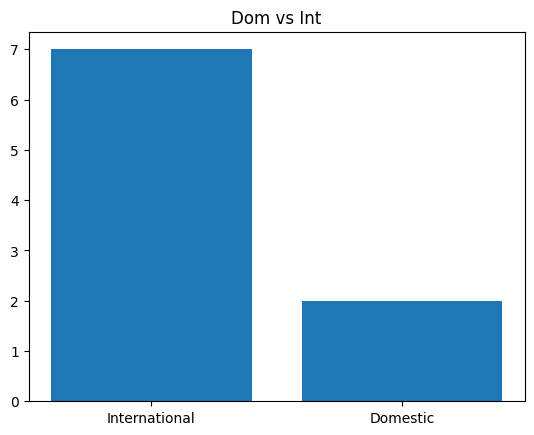

In [63]:
data = df['nation'].value_counts().values
labels = df['nation'].value_counts().keys()
draw_bar_graph(data,labels,"Dom vs Int")

Function for Pie chart

In [64]:
def pie_chart(categories, values, title):
    plt.pie(values, labels=categories)
    
    plt.title(title)
    plt.axis('equal')
    plt.show()

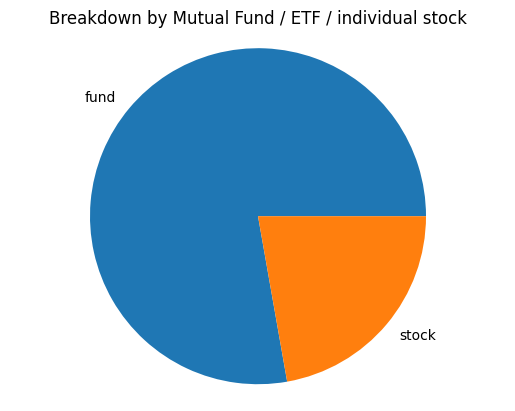

In [65]:
category = df['holding_type'].value_counts().keys()
values = df['holding_type'].value_counts().values
pie_chart(category, values, "Breakdown by Mutual Fund / ETF / individual stock")

Making size columnn

In [66]:
df['cap_size']=""

df.loc[df['investment_amt'] <= 2000, 'cap_size'] = 'small'
df.loc[(df['investment_amt'] > 2000) & (df['investment_amt'] < 6000), 'cap_size'] = 'mid'
df.loc[df['investment_amt'] >= 6000, 'cap_size'] = 'large'

df

,holding,investment_amt,holding_type,sector,country,nation,cap_size
0,LCLAX,10000,fund,NaN,Sweden,International,large
1,MAPTX,10000,fund,NaN,United States,Domestic,large
2,SCHB,10000,fund,NaN,Canada,International,large
3,IYK,10000,fund,NaN,France,International,large
4,SCHA,10000,fund,NaN,China,International,large
5,SCHM,10000,fund,NaN,India,International,large
6,AAPL,2000,stock,Technology,Brazil,International,small
7,test_stock,2000,stock,Technology,United States,Domestic,small
8,SPY,10000,fund,NaN,India,International,large


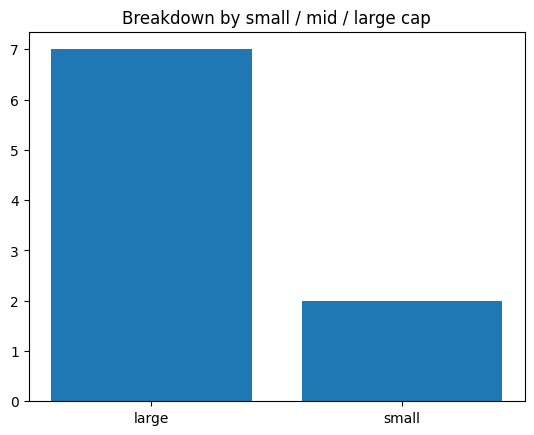

In [67]:
data = df['cap_size'].value_counts().keys()
values = df['cap_size'].value_counts().values
draw_bar_graph(values, data, "Breakdown by small / mid / large cap")

In [68]:
invst_sum = df.groupby("country")["investment_amt"].sum()
invst_sum

country
Brazil            2000
Canada           10000
China            10000
France           10000
India            20000
Sweden           10000
United States    12000
Name: investment_amt, dtype: int64

In [69]:
def map_graph(location, value):
  fig = px.choropleth(df, locationmode='country names', locations = location, color = value)
  fig.show()

In [70]:
map_graph(invst_sum.keys(),invst_sum.values)